In [3]:
import pandas as pd

df = pd.read_csv("../data/processed/cleaned_telco_data.csv")




In [4]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
cat_cols = df_encoded.select_dtypes(include="object").columns

le = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [5]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


c:\Users\Admin\Downloads\Telecom\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:23:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


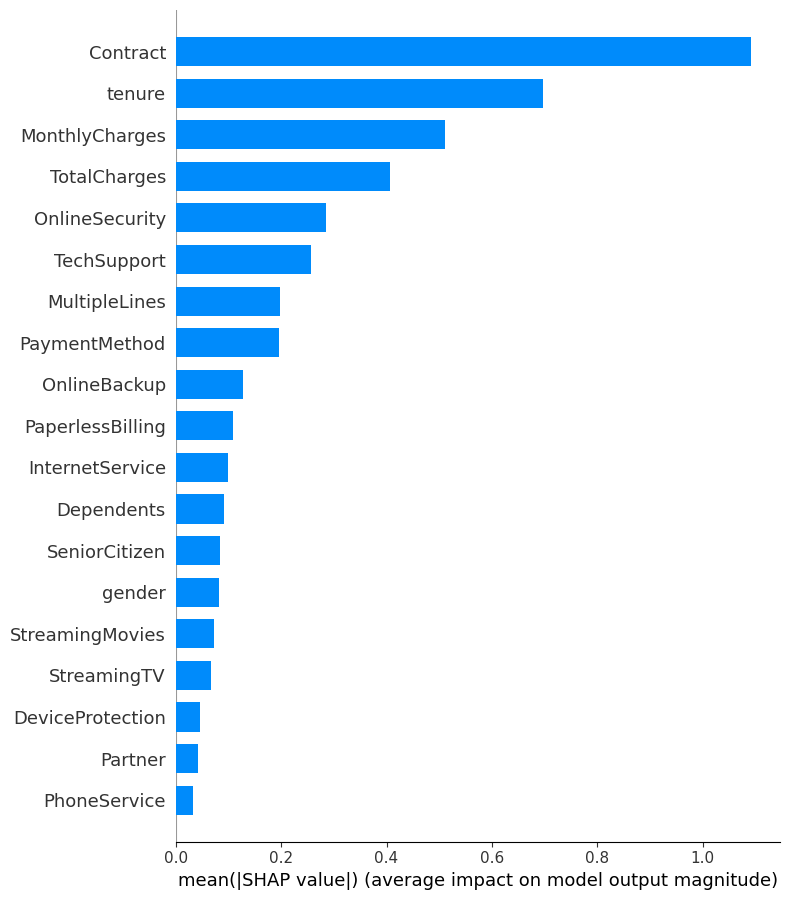

In [7]:
import shap

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")


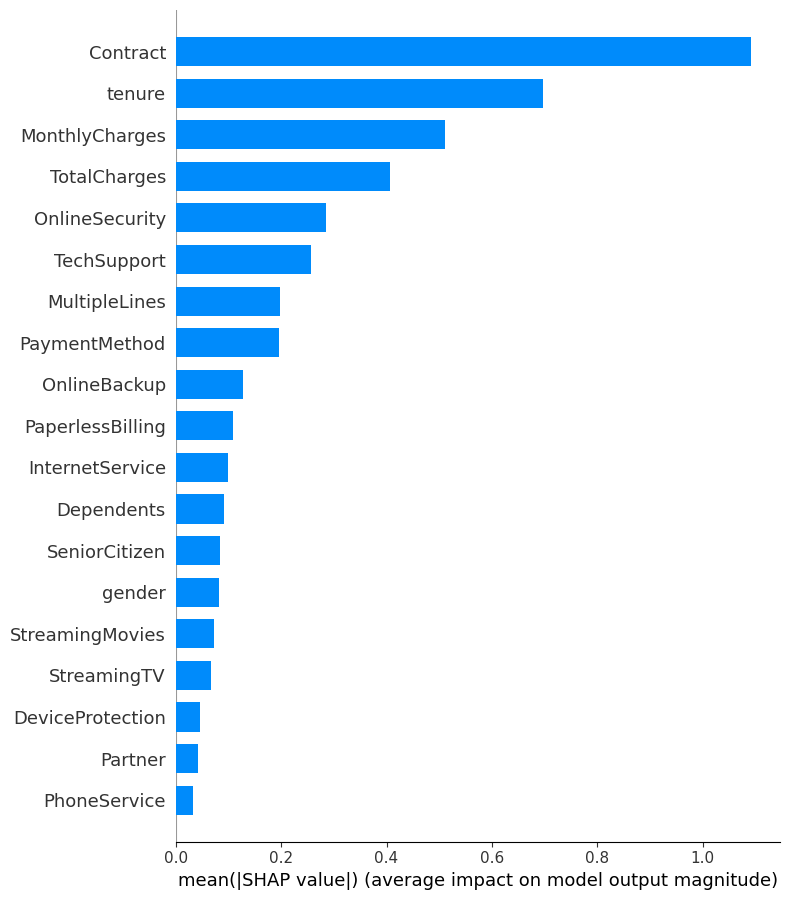

In [8]:
# Plot summary of feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")


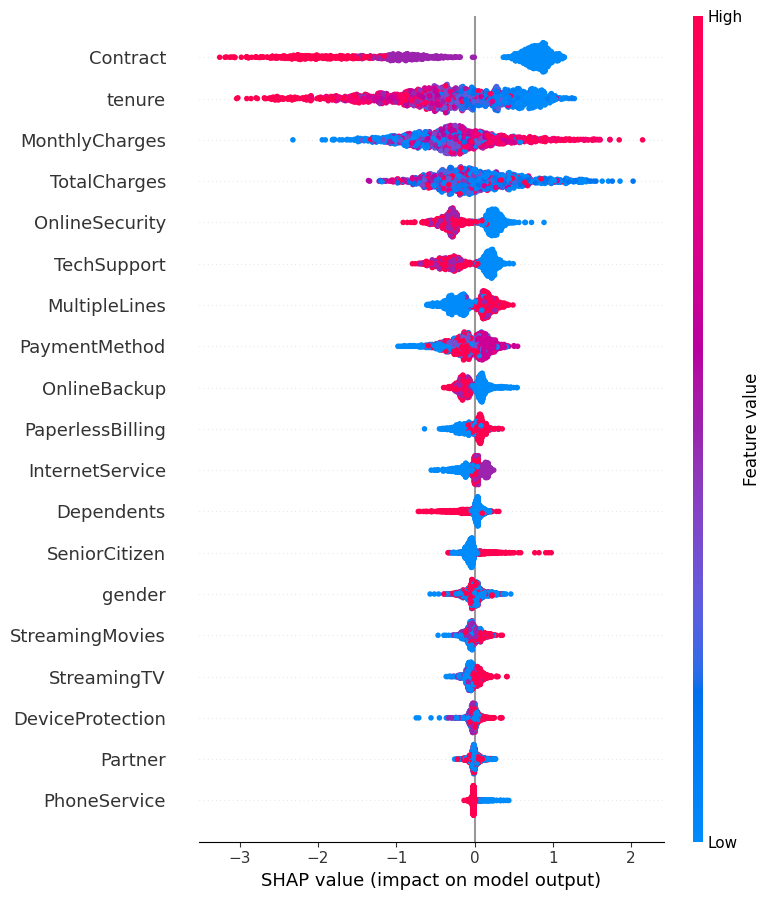

In [9]:
# More detailed (color-coded) view per feature
shap.summary_plot(shap_values, X_test)


In [10]:
# Force plot for a single customer (e.g., index 10)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[10], X_test.iloc[10])


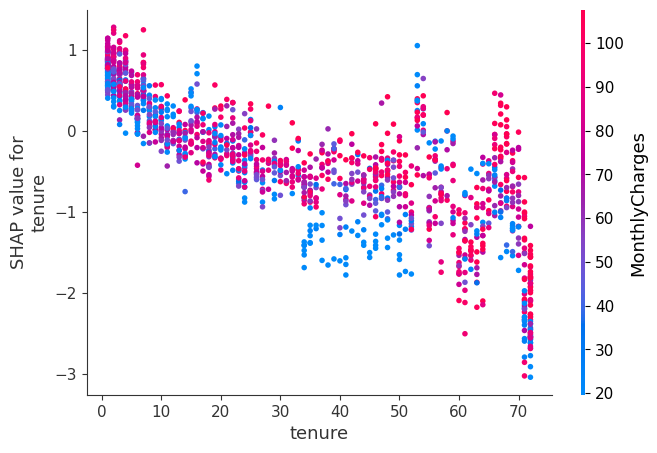

In [11]:
# See how 'tenure' affects churn across all customers
shap.dependence_plot("tenure", shap_values, X_test)


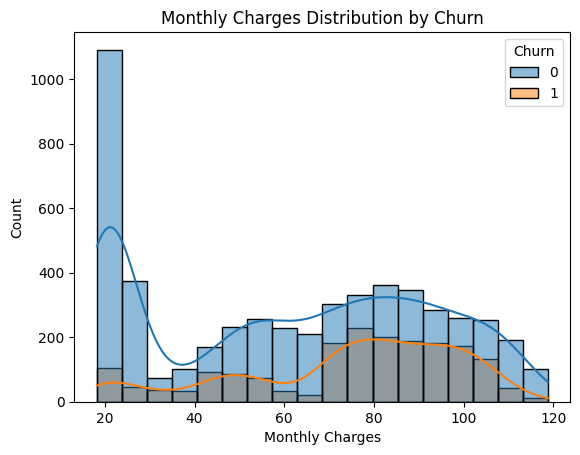

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=df, x="MonthlyCharges", hue="Churn", kde=True)
plt.title("Monthly Charges Distribution by Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_23772\3690586511.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Churn", title_fontsize=12)


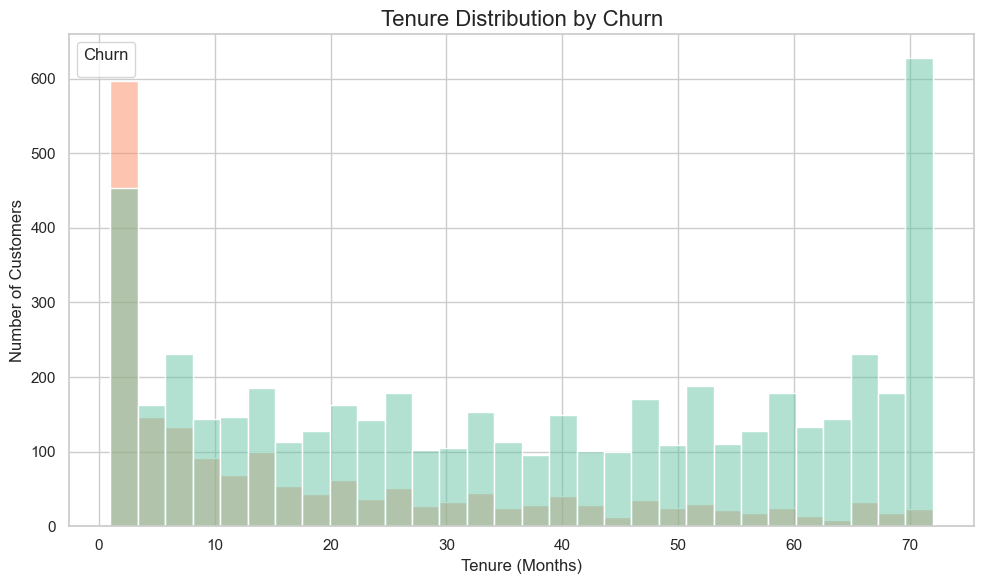

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("C:/Users/Admin/Downloads/Telecom/data/processed/cleaned_telco_data.csv")

# Set seaborn style for clean plots
sns.set(style="whitegrid")

# Convert 'Churn' column to string for better legend labels if it's numeric
df["Churn"] = df["Churn"].map({1: "Yes", 0: "No"})

# Plot: Tenure Distribution by Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="tenure", hue="Churn", bins=30, kde=False, palette="Set2")
plt.title("Tenure Distribution by Churn", fontsize=16)
plt.xlabel("Tenure (Months)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.legend(title="Churn", title_fontsize=12)
plt.tight_layout()
plt.show()



In [15]:
print(df.columns)



Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [3]:
import pandas as pd
import numpy as np

# Load your cleaned dataset
df = pd.read_csv("C:/Users/Admin/Downloads/Telecom/data/processed/cleaned_telco_data.csv")

# Create a list of common Indian states (you can customize)
states = [
    "Karnataka", "Maharashtra", "Delhi", "Tamil Nadu", "Kerala",
    "Telangana", "Gujarat", "West Bengal", "Rajasthan", "Uttar Pradesh"
]

# Randomly assign a state to each customer
np.random.seed(42)  # for reproducibility
df["State"] = np.random.choice(states, size=len(df))

# Group by State and calculate churn rate
state_churn = df.groupby("State").agg(
    Customers=("Churn", "count"),
    Churned=("Churn", "sum")
).reset_index()

state_churn["Churn_Rate"] = round(100 * state_churn["Churned"] / state_churn["Customers"], 2)

# Preview
print(state_churn)


           State  Customers  Churned  Churn_Rate
0          Delhi        707      187       26.45
1        Gujarat        709      188       26.52
2      Karnataka        723      178       24.62
3         Kerala        697      180       25.82
4    Maharashtra        687      188       27.37
5      Rajasthan        676      191       28.25
6     Tamil Nadu        694      177       25.50
7      Telangana        729      201       27.57
8  Uttar Pradesh        715      181       25.31
9    West Bengal        695      198       28.49
